1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:
from sklearn.datasets import load_breast_cancer
my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

<ipython-input-2-a2a43d916fdf>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tsne_df['label'].replace(0.0, 'Malignant', inplace=True)


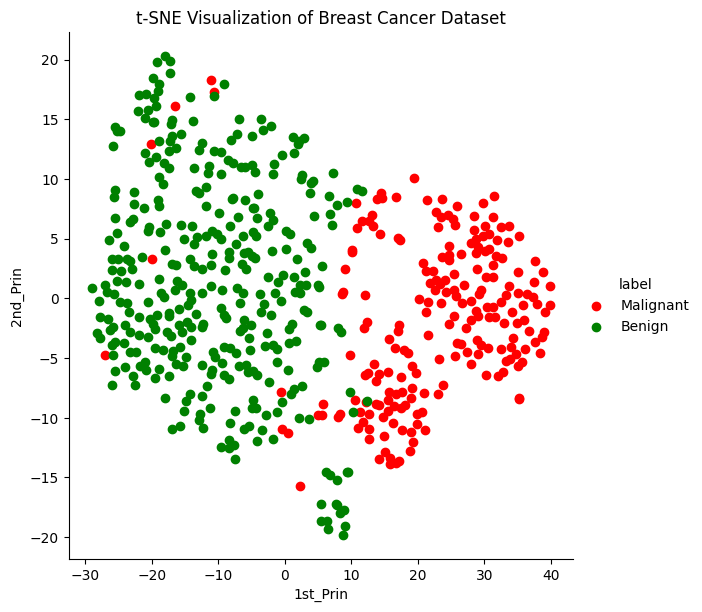

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

raw_data = my_data.data
labels = my_data.target

normalized_data = StandardScaler().fit_transform(raw_data)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(normalized_data)

tsne_df = pd.DataFrame(np.vstack((tsne_data.T, labels)).T,
                       columns=['1st_Prin', '2nd_Prin', 'label'])

tsne_df['label'].replace(0.0, 'Malignant', inplace=True)
tsne_df['label'].replace(1.0, 'Benign', inplace=True)

pal = dict(Malignant="red", Benign="green")

ax = sns.FacetGrid(tsne_df, hue='label', height=6, palette=pal,
                   hue_order=["Malignant", "Benign"]).\
                   map(plt.scatter, '1st_Prin', '2nd_Prin').\
                   add_legend()

plt.title("t-SNE Visualization of Breast Cancer Dataset")
plt.show()


3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.3, random_state=42, stratify=labels)

4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# model_decision_tree = DecisionTreeClassifier(...)
# model_decision_tree.fit(...)
model_decision_tree = DecisionTreeClassifier(criterion= 'gini',max_depth=5,random_state=42)
model_decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# model_random_forest = RandomForestClassifier(...)
# model_random_forest.fit(...)
model_random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_random_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=42)

6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# model_adaboost = AdaBoostClassifier(...)
# model_adaboost.fit(...)
model_adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
model_adaboost.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    return accuracy, precision, recall, f1

dt_acc, dt_prec, dt_recall, dt_f1 = evaluate_model(model_decision_tree, X_test, Y_test)
rf_acc, rf_prec, rf_recall, rf_f1 = evaluate_model(model_random_forest, X_test, Y_test)
ab_acc, ab_prec, ab_recall, ab_f1 = evaluate_model(model_adaboost, X_test, Y_test)

print("Model Evaluation Results:")
print("Decision Tree -> Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(dt_acc, dt_prec, dt_recall, dt_f1))
print("Random Forest -> Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(rf_acc, rf_prec, rf_recall, rf_f1))
print("AdaBoost      -> Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(ab_acc, ab_prec, ab_recall, ab_f1))

accuracies = {'Decision Tree': dt_acc, 'Random Forest': rf_acc, 'AdaBoost': ab_acc}
winner = max(accuracies, key=accuracies.get)
print(f"\nWinner: {winner} with the highest accuracy of {accuracies[winner]:.2f}")

Model Evaluation Results:
Decision Tree -> Accuracy: 0.93, Precision: 0.94, Recall: 0.94, F1-Score: 0.94
Random Forest -> Accuracy: 0.94, Precision: 0.94, Recall: 0.96, F1-Score: 0.95
AdaBoost      -> Accuracy: 0.96, Precision: 0.95, Recall: 1.00, F1-Score: 0.97

Winner: AdaBoost with the highest accuracy of 0.96
